<a href="https://colab.research.google.com/github/nandhukumar86/CapstonePneumoniaDetection/blob/main/Pneumonia_Detection_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


In [10]:
import pickle

file = open('/content/drive/MyDrive/CapstoneDataSet/dataset/RezisedLabel-1.pickle', 'rb')
dfLabelsCopy = pickle.load(file)
file.close()

In [11]:
dfLabelsCopy.head()

,patientId,x,y,width,height,Target,X,Y,Image256,Xo,Yo,xo,yo,widtho,heighto,Age,Sex
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1024,1024,"[[92, 50, 30, 17, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4...",256,256,NaN,NaN,NaN,NaN,51,F
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,1024,1024,"[[20, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",256,256,NaN,NaN,NaN,NaN,48,F
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1024,1024,"[[18, 16, 15, 15, 14, 14, 13, 14, 14, 14, 14, ...",256,256,NaN,NaN,NaN,NaN,19,M
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1024,1024,"[[205, 202, 193, 192, 187, 185, 180, 179, 177,...",256,256,NaN,NaN,NaN,NaN,28,M
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,1024,1024,"[[2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 4, 4, 5,...",256,256,66.0,38.0,54.0,95.0,32,F


In [12]:
# Getting Center of Bounding Boxes
dfLabelsCopy['centerx'] = dfLabelsCopy.xo + (dfLabelsCopy.widtho/2)
dfLabelsCopy['centery'] = dfLabelsCopy.yo + (dfLabelsCopy.heighto/2)

df1 = dfLabelsCopy[dfLabelsCopy.Target == 1].copy(deep=True)

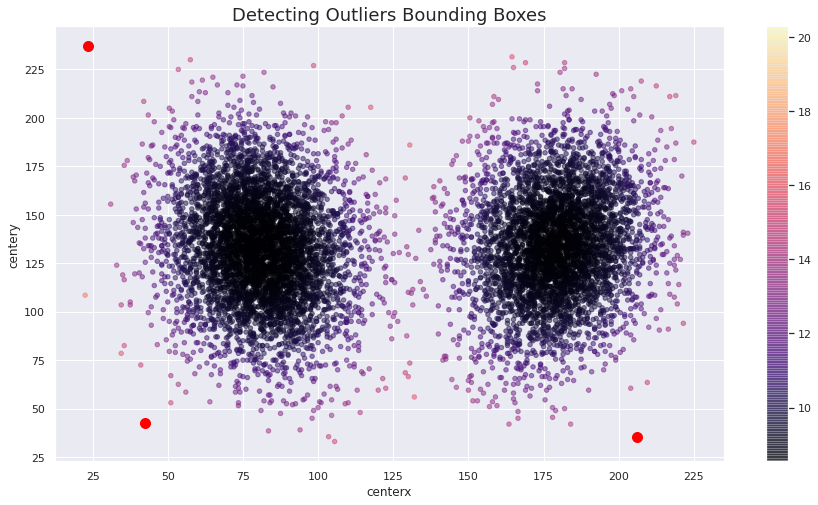

In [13]:
# GaussianMixture for clustering 

from sklearn.mixture import GaussianMixture

clf = GaussianMixture(n_components=2)

clf.fit(df1[['centerx', 'centery']])
center_probs = clf.predict_proba(df1[['centerx', 'centery']])
Z = -clf.score_samples(df1[['centerx', 'centery']])
outliers = df1.iloc[Z > 17]
fig, ax = plt.subplots(figsize=(15,8))
df1[['centerx','centery']].plot.scatter('centerx', 'centery', c=Z, alpha=0.5, cmap='magma', ax=ax)
outliers.plot.scatter('centerx', 'centery', c='red', marker='o', s=100, ax=ax)

_ = ax.set_title('Detecting Outliers Bounding Boxes', fontsize=18)

In [27]:
import cv2
import os
import glob
import shutil
from google.colab.patches import cv2_imshow

In [28]:
def show_img(patientId):
  points = np.array(dfLabelsCopy[dfLabelsCopy.patientId == patientId][['xo','yo','widtho','heighto']])

  img = np.array(dfLabelsCopy[dfLabelsCopy.patientId == patientId][['Image256']].head(1))[0][0]

  for i in points:
    start = (int(i[0]), int(i[1]))
    end = (int(i[0]+i[2]) , int(i[1]+i[3]))
    color = (255,0,0)
    img = cv2.rectangle(img, start , end, color, 2)

  cv2_imshow(img)


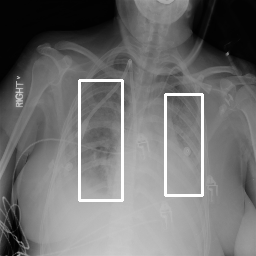

In [29]:
show_img('000db696-cf54-4385-b10b-6b16fbb3f985')

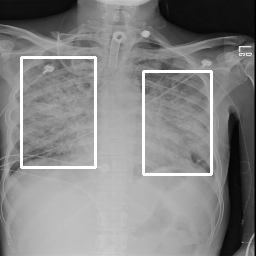

In [30]:
show_img('000fe35a-2649-43d4-b027-e67796d412e0')